# WeRateDogs Twitter Analysis
Wrangle and Analyze Data Project Submission  
Data Analyst Nanodegree Program  
Jessica Ertel  

### Table of Contents
- [Data Gathering](#Data-Gathering)
- [Data Assessing](#Data-Assessing)
- [Data Cleaning: Tidiness](#Data-Cleaning:-Tidiness)
- [Data Cleaning: Quality](#Data-Cleaning:-Quality)
- [Analyze and Visualize](#Analyze-and-Visualize)

In [1]:
# data gathering 
import config
import os
import requests
import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# standard data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser

## Data Gathering
There are three elements of data gathering involved in this section. The WeRateDogs Twitter archive was provided by Udacity and downloaded manually. Using the tweet IDs from the WeRateDogs Twitter archive, I query the Twitter API for each tweet's JSON data and write the data to a text file. Finally, tweet image predictions according to a neural network are downloaded programmatically from Udacity's servers using the Requests library.

In [2]:
# import WeRateDogs twitter archive (provided by Udacity)
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = config.CONSUMER_KEY
consumer_secret = config.CONSUMER_SECRET
access_token = config.ACCESS_TOKEN
access_secret = config.ACCESS_SECRET

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Gather IDs from WeRateDogs twitter archive
tweet_ids = archive.tweet_id.values


# Query Twitter's API for JSON data for each tweet ID
# Save each tweet's returned JSON as a new line in a .txt file
fails_dict = {}

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(f"Tweet ID: {tweet_id} no longer exists.") 
            fails_dict[tweet_id] = e
            pass

print(fails_dict)

Tweet ID: 888202515573088257 no longer exists.
Tweet ID: 873697596434513921 no longer exists.
Tweet ID: 872668790621863937 no longer exists.
Tweet ID: 872261713294495745 no longer exists.
Tweet ID: 869988702071779329 no longer exists.
Tweet ID: 866816280283807744 no longer exists.
Tweet ID: 861769973181624320 no longer exists.
Tweet ID: 856602993587888130 no longer exists.
Tweet ID: 851953902622658560 no longer exists.
Tweet ID: 845459076796616705 no longer exists.
Tweet ID: 844704788403113984 no longer exists.
Tweet ID: 842892208864923648 no longer exists.
Tweet ID: 837366284874571778 no longer exists.
Tweet ID: 837012587749474308 no longer exists.
Tweet ID: 829374341691346946 no longer exists.
Tweet ID: 827228250799742977 no longer exists.
Tweet ID: 812747805718642688 no longer exists.
Tweet ID: 802247111496568832 no longer exists.
Tweet ID: 779123168116150273 no longer exists.
Tweet ID: 775096608509886464 no longer exists.
Tweet ID: 771004394259247104 no longer exists.
Tweet ID: 770

In [16]:
# Load in json data line by line and turn into pandas df
data = []
with open('tweet-json.txt') as json_file:
    for row in json_file:
        json_data = json.loads(row)
        data.append({"tweet_id":json_data["id"],
                   "favorites":json_data["favorite_count"],
                   "retweets":json_data["retweet_count"],
                   "timestamp":json_data["created_at"]})

tweets = pd.DataFrame(data, columns=['tweet_id',
                                     'favorites',
                                     'retweets',
                                     'timestamp'])

In [17]:
tweets.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [7]:
# Save to csv
tweets.to_csv('twitter_scrape.csv', index=False)

In [8]:
# download image predictions programmatically (provided by Udacity)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
preds = requests.get(url,auth=('user', 'pass'))

with open('image_predictions.tsv', 'wb') as file:
    file.write(preds.content)

image_preds = pd.read_csv('image_predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Data Assessing
After gathering the data, I assess them visually and programmatically for quality and tidiness issues. While there are many areas that can be cleaned, this assignment requires that I detect and document eight quality issues and two tidiness issues.

### Assessment
**Data Tidiness Issues**  
- Merge the scraped twitter posts (tweets) with the archived posts (archive) to create an enhanced Twitter archive.
- Address missing data.

**Data Quality Issues**  
- Filter the newly combined twitter posts DataFrame to match the posts in the `image_preds` DataFrame.
- Update data type for `tweet_id` column to a string.
- Update the data type for `timestamp` columns to datetime object, then confirm they are the same and drop the duplicate.
- Merge the four dog stage columns into one and rename.
- Change inaccurate names ('just', 'a', 'the', 'an', 'by', 'his', 'O', 'my', 'all') to 'None'.
- Update the scores that were incorrectly identified from the text column.
- Make all the image prediction strings lowercase in the `image_preds` DataFrame.
- Update the column names in the `image_preds` DataFrame to make them more intuitive.

## Data Cleaning: Tidiness

In [9]:
# import tweets
tweets = pd.read_csv('twitter_scrape.csv')
tweets.shape

(2354, 4)

In [10]:
image_preds.shape

(2075, 12)

In [11]:
archive.shape

(2356, 17)

### Merge Twitter Posts with Archive

In [12]:
# merge new tweets with the archive dataset
full = pd.merge(tweets, archive, on='tweet_id')
full.to_csv('twitter_archive_master.csv', index=False)

In [13]:
full = pd.read_csv('twitter_archive_master.csv')
full.head()

,tweet_id,favorites,retweets,timestamp_x,in_reply_to_status_id,in_reply_to_user_id,timestamp_y,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
full.shape

(2354, 20)

### Check for Nulls

In [15]:
# Check percentage of null values per column
full.isnull().sum() / len(full) * 100

tweet_id                       0.000000
favorites                      0.000000
retweets                       0.000000
timestamp_x                    0.000000
in_reply_to_status_id         96.686491
in_reply_to_user_id           96.686491
timestamp_y                    0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.395922
retweeted_status_user_id      92.395922
retweeted_status_timestamp    92.395922
expanded_urls                  2.506372
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [16]:
# Drop high % null columns and unnecessary columns
full.drop(columns=['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id', 
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'expanded_urls', 
                   'source'], inplace=True)

## Data Cleaning: Quality

### Filter to matching records

In [17]:
# There are more tweets than image predictions
image_preds['tweet_id'].nunique(), full['tweet_id'].nunique()

(2075, 2354)

In [18]:
# Filter the full dataset to include same IDs as image_preds
full = full[full['tweet_id'].isin(image_preds['tweet_id'])]
full.shape

(2073, 13)

### Change tweet_id to a string

In [19]:
full['tweet_id'] = full['tweet_id'].astype('str')

# Confirm change
full['tweet_id'].dtype

dtype('O')

### Change timestamp columns to datetime

In [20]:
# remove day of the week
full['timestamp_x'] = full['timestamp_x'].str.slice(4, )

In [21]:
# Change timestamp_x and y to datetime format
# illustrate two options for approaching this
full['timestamp_x'] = [datetime.strptime(row, '%b %d %H:%M:%S %z %Y') for row in full['timestamp_x']]
full['timestamp_y'] = [parser.parse(row) for row in full['timestamp_y']]

# Confirm change
full.dtypes

tweet_id                               object
favorites                               int64
retweets                                int64
timestamp_x               datetime64[ns, UTC]
timestamp_y           datetime64[ns, tzutc()]
text                                   object
rating_numerator                        int64
rating_denominator                      int64
name                                   object
doggo                                  object
floofer                                object
pupper                                 object
puppo                                  object
dtype: object

In [22]:
# Confirm timestamps match
(full['timestamp_x'] == full['timestamp_y']).value_counts()

True    2073
dtype: int64

In [23]:
# Drop duplicate column
full.drop(columns=['timestamp_y'], inplace=True)

### Merge dog stages into one column

In [24]:
# Can a dog identify in multiple stages?
full[(full['doggo']=='doggo')&(full['floofer']=='floofer')]

,tweet_id,favorites,retweets,timestamp_x,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
199,854010172552949760,17169,3433,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11,10,None,doggo,floofer,None,None


In [25]:
# Iterate through dog stages and combine into one column
full['stage'] = full[['doggo', 'floofer', 'pupper', 'puppo']] \
.apply(lambda x: ','.join(x).replace('None,', '').replace(',None', ''), axis=1)

In [26]:
# Confirm value counts
full['stage'].value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [27]:
# Drop original dog stage columns
full.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [28]:
# Should have 22 columns
full.shape

(2073, 9)

### Update innaccurate dog names

In [29]:
# Replace unlikely dog names with 'None'
full['name'].replace(['just', 'a', 'the', 'an', 'by', 'his', 'O', 'my', 'all'], 'None', inplace=True)

In [30]:
# Confirm replace worked correctly
full[(full['name']=='just') | (full['name']=='a') | (full['name']=='my')]

,tweet_id,favorites,retweets,timestamp_x,text,rating_numerator,rating_denominator,name,stage


### Update incorrect ratings

In [31]:
# Check for denominators above 10
full[(full['rating_denominator'] > 10)]

,tweet_id,favorites,retweets,timestamp_x,text,rating_numerator,rating_denominator,name,stage
432,820690176645140481,13518,3716,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,84,70,None,None
900,758467244762497024,5316,2539,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,165,150,None,None
1066,740373189193256964,20648,9220,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She ...",9,11,None,None
1118,731156023742988288,4196,1434,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,204,170,this,None
1163,722974582966214656,4493,1764,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None
1200,716439118184652801,2574,247,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None
1226,713900603437621249,3062,829,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None
1252,710658690886586372,2529,636,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,80,80,None,None
1272,709198395643068416,2634,721,2016-03-14 02:04:08+00:00,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,None
1349,704054845121142784,3201,1028,2016-02-28 21:25:30+00:00,Here is a whole flock of puppers. 60/50 I'll ...,60,50,None,None


In [32]:
# Analyze full text column for errors
with pd.option_context('display.max_colwidth', -1): 
    display(full[(full['rating_denominator'] > 10)]['text'])

432     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
900     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1066    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1118    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1163    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                  
1200    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                             
1226    Happy Saturday here's 9 puppers on a bench. 99/90 good work ev

In [33]:
# create a function to easily update scores for specific records
def update_ranking(row, numerator, denominator):
    full.loc[row, 'rating_numerator'] = numerator
    full.loc[row, 'rating_denominator'] = denominator
    return full.loc[[row], ['rating_numerator', 'rating_denominator']]

In [34]:
# row 1066 rating should be 14/10
update_ranking(1066, 14, 10)

,rating_numerator,rating_denominator
1066,14,10


In [35]:
# row 1163 rating should be 13/10
update_ranking(1163, 13, 10)

,rating_numerator,rating_denominator
1163,13,10


In [36]:
# row 1200 rating should be 11/10
update_ranking(1200, 11, 10)

,rating_numerator,rating_denominator
1200,11,10


In [37]:
# row 1660 rating should be 10/10
update_ranking(1660, 10, 10)

,rating_numerator,rating_denominator
1660,10,10


### Make all image predictions lowercase

In [38]:
image_preds['p1'] = [row.lower() for row in image_preds['p1']]
image_preds['p2'] = [row.lower() for row in image_preds['p2']]
image_preds['p3'] = [row.lower() for row in image_preds['p3']]

In [39]:
# Confirm change
image_preds[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


### Update column names

In [40]:
# Change the column names to make them more interpretable
image_preds.rename(columns= {'p1': 'pred_1',
                             'p2': 'pred_2',
                             'p3': 'pred_3',}, inplace=True)

## Analyze and Visualize
I analyze and visualize the wrangled data, then conclude by sharing some insights.

### Plot Top Categories of Predictions

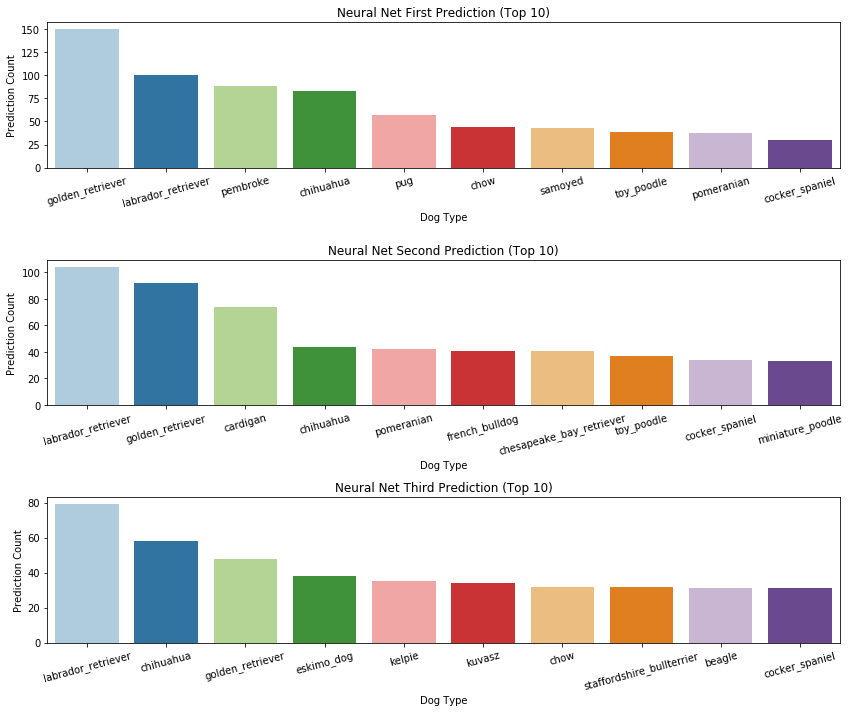

In [78]:
plt.figure(figsize=(12,10)) 

# First predictions
plt.subplot(3,1,1)
top_10 = sns.countplot(x='pred_1', 
                       data=image_preds, 
                       palette="Paired", 
                       order=image_preds['pred_1'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net First Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)

# Second predictions
plt.subplot(3,1,2)
top_10 = sns.countplot(x='pred_2', 
                       data=image_preds, 
                       palette="Paired", 
                       order=image_preds['pred_2'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net Second Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)


# Third predictions
plt.subplot(3,1,3)
top_10 = sns.countplot(x='pred_3', 
                       data=image_preds, 
                       palette="Paired", 
                       order=image_preds['pred_3'].value_counts().iloc[:10].index)

top_10.set_xlabel('Dog Type')
top_10.set_ylabel('Prediction Count')
top_10.set_title('Neural Net Third Prediction (Top 10)')
top_10.set_xticklabels(labels=top_10.get_xticklabels(), rotation=15)
plt.tight_layout(); 

### Identify Timestamp Trends

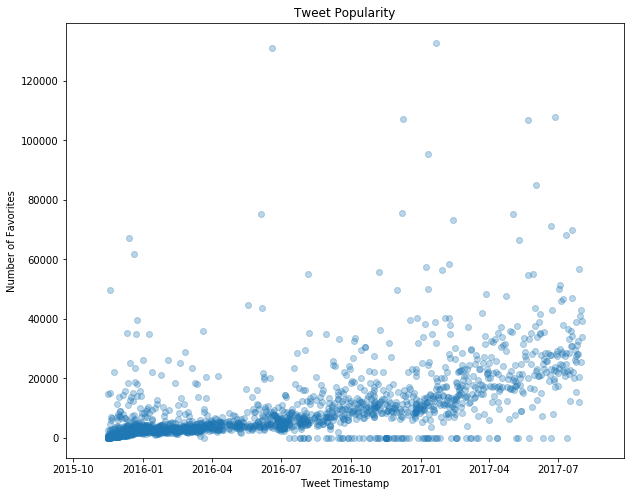

In [96]:
plt.figure(figsize=(10,8)) 

plt.scatter(x=full['timestamp_x'], 
            y=full['favorites'],
            alpha=.3)

plt.xlabel('Tweet Timestamp')
plt.ylabel('Number of Favorites')
plt.title('Tweet Popularity');

### Insights

- The two most common categories of dogs predicted by the neural net were golden retrievers and labrador retrievers. The chart doesn't illustrate the confidence level in each prediction, but we can expect that these breeds are likely the most popular on the WeRateDogs account.
- The Chihuahua is also a popular breed predicted by the neural net. Maybe the dogs with a higher number of predictions have very specific features and therefore, are easier for the neural net to identify.
- Tweets on the WeRateDogs account are increasing in popularity over time. In 2017, tweets appear to be getting a higher average number of favorites compared to the beginning of 2016 and there are fewer tweets with 0 favorites.